## Work
1. 請建立自己的deep neural network
2. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
3. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras
from keras.datasets import cifar10

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
#os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train, num_classes=10)
y_test = np_utils.to_categorical(y_test, num_classes=10)

In [4]:
# 建立一個有三層隱藏層之神經網路
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 3072)]            0         
                                                                 
 dense (Dense)               (None, 512)               1573376   
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [5]:
"""
Compile 模型
"""
import tensorflow as tf
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [6]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Epoch 1/500
196/196 [==============================] - 5s 12ms/step - loss: 1.9352 - accuracy: 0.3016 - val_loss: 1.7729 - val_accuracy: 0.3625
Epoch 2/500
196/196 [==============================] - 1s 7ms/step - loss: 1.7063 - accuracy: 0.3901 - val_loss: 1.7089 - val_accuracy: 0.3877
Epoch 3/500
196/196 [==============================] - 1s 7ms/step - loss: 1.6185 - accuracy: 0.4230 - val_loss: 1.6187 - val_accuracy: 0.4208
Epoch 4/500
196/196 [==============================] - 1s 7ms/step - loss: 1.5569 - accuracy: 0.4453 - val_loss: 1.5395 - val_accuracy: 0.4540
Epoch 5/500
196/196 [==============================] - 1s 7ms/step - loss: 1.5088 - accuracy: 0.4624 - val_loss: 1.5248 - val_accuracy: 0.4647
Epoch 6/500
196/196 [==============================] - 1s 7ms/step - loss: 1.4655 - accuracy: 0.4776 - val_loss: 1.4506 - val_accuracy: 0.4851
Epoch 7/500
196/196 [==============================] - 1s 7ms/step - loss: 1.4288 - accuracy: 0.4931 - val_loss: 1.4964 - val_accuracy: 0.474

Epoch 58/500
196/196 [==============================] - 1s 7ms/step - loss: 0.5570 - accuracy: 0.8009 - val_loss: 2.0121 - val_accuracy: 0.5159
Epoch 59/500
196/196 [==============================] - 1s 7ms/step - loss: 0.5572 - accuracy: 0.7996 - val_loss: 2.0431 - val_accuracy: 0.5164
Epoch 60/500
196/196 [==============================] - 1s 7ms/step - loss: 0.5502 - accuracy: 0.8019 - val_loss: 2.0824 - val_accuracy: 0.5090
Epoch 61/500
196/196 [==============================] - 1s 7ms/step - loss: 0.5340 - accuracy: 0.8079 - val_loss: 2.0000 - val_accuracy: 0.5180
Epoch 62/500
196/196 [==============================] - 1s 7ms/step - loss: 0.5169 - accuracy: 0.8161 - val_loss: 2.1140 - val_accuracy: 0.5156
Epoch 63/500
196/196 [==============================] - 1s 7ms/step - loss: 0.5012 - accuracy: 0.8219 - val_loss: 2.0975 - val_accuracy: 0.5176
Epoch 64/500
196/196 [==============================] - 1s 7ms/step - loss: 0.4986 - accuracy: 0.8206 - val_loss: 2.1619 - val_accuracy:

Epoch 115/500
196/196 [==============================] - 2s 8ms/step - loss: 0.2646 - accuracy: 0.9037 - val_loss: 3.6645 - val_accuracy: 0.5065
Epoch 116/500
196/196 [==============================] - 2s 8ms/step - loss: 0.2515 - accuracy: 0.9093 - val_loss: 3.6244 - val_accuracy: 0.5022
Epoch 117/500
196/196 [==============================] - 1s 8ms/step - loss: 0.2561 - accuracy: 0.9088 - val_loss: 3.7817 - val_accuracy: 0.5047
Epoch 118/500
196/196 [==============================] - 2s 8ms/step - loss: 0.2202 - accuracy: 0.9224 - val_loss: 3.9117 - val_accuracy: 0.4961
Epoch 119/500
196/196 [==============================] - 2s 8ms/step - loss: 0.2596 - accuracy: 0.9071 - val_loss: 3.7932 - val_accuracy: 0.4959
Epoch 120/500
196/196 [==============================] - 1s 8ms/step - loss: 0.2704 - accuracy: 0.9045 - val_loss: 3.7177 - val_accuracy: 0.5008
Epoch 121/500
196/196 [==============================] - 1s 7ms/step - loss: 0.2229 - accuracy: 0.9201 - val_loss: 3.8437 - val_ac

196/196 [==============================] - 1s 8ms/step - loss: 0.1799 - accuracy: 0.9369 - val_loss: 5.1077 - val_accuracy: 0.4987
Epoch 172/500
196/196 [==============================] - 1s 8ms/step - loss: 0.1808 - accuracy: 0.9355 - val_loss: 4.9394 - val_accuracy: 0.5041
Epoch 173/500
196/196 [==============================] - 1s 8ms/step - loss: 0.1829 - accuracy: 0.9364 - val_loss: 4.8859 - val_accuracy: 0.4976
Epoch 174/500
196/196 [==============================] - 1s 8ms/step - loss: 0.1424 - accuracy: 0.9497 - val_loss: 5.0551 - val_accuracy: 0.4983
Epoch 175/500
196/196 [==============================] - 1s 7ms/step - loss: 0.1949 - accuracy: 0.9320 - val_loss: 5.1259 - val_accuracy: 0.4935
Epoch 176/500
196/196 [==============================] - 1s 7ms/step - loss: 0.1763 - accuracy: 0.9364 - val_loss: 5.0708 - val_accuracy: 0.4946
Epoch 177/500
196/196 [==============================] - 1s 7ms/step - loss: 0.0987 - accuracy: 0.9662 - val_loss: 5.1937 - val_accuracy: 0.5011

196/196 [==============================] - 1s 7ms/step - loss: 0.1719 - accuracy: 0.9433 - val_loss: 5.6052 - val_accuracy: 0.4849
Epoch 228/500
196/196 [==============================] - 2s 8ms/step - loss: 0.2680 - accuracy: 0.9168 - val_loss: 5.7640 - val_accuracy: 0.4993
Epoch 229/500
196/196 [==============================] - 1s 7ms/step - loss: 0.0866 - accuracy: 0.9694 - val_loss: 5.8507 - val_accuracy: 0.4965
Epoch 230/500
196/196 [==============================] - 1s 7ms/step - loss: 0.0930 - accuracy: 0.9682 - val_loss: 6.0259 - val_accuracy: 0.4984
Epoch 231/500
196/196 [==============================] - 1s 7ms/step - loss: 0.1080 - accuracy: 0.9633 - val_loss: 6.0168 - val_accuracy: 0.4962
Epoch 232/500
196/196 [==============================] - 1s 7ms/step - loss: 0.1430 - accuracy: 0.9511 - val_loss: 5.9774 - val_accuracy: 0.4923
Epoch 233/500
196/196 [==============================] - 1s 7ms/step - loss: 0.1666 - accuracy: 0.9436 - val_loss: 5.7463 - val_accuracy: 0.4927

196/196 [==============================] - 1s 7ms/step - loss: 0.0578 - accuracy: 0.9804 - val_loss: 6.5407 - val_accuracy: 0.5009
Epoch 284/500
196/196 [==============================] - 1s 7ms/step - loss: 0.0449 - accuracy: 0.9851 - val_loss: 6.5835 - val_accuracy: 0.5022
Epoch 285/500
196/196 [==============================] - 1s 7ms/step - loss: 0.1455 - accuracy: 0.9517 - val_loss: 6.5910 - val_accuracy: 0.4909
Epoch 286/500
196/196 [==============================] - 1s 7ms/step - loss: 0.1868 - accuracy: 0.9404 - val_loss: 6.4884 - val_accuracy: 0.4987
Epoch 287/500
196/196 [==============================] - 1s 7ms/step - loss: 0.0642 - accuracy: 0.9780 - val_loss: 6.5332 - val_accuracy: 0.4971
Epoch 288/500
196/196 [==============================] - 2s 8ms/step - loss: 0.0489 - accuracy: 0.9837 - val_loss: 6.5791 - val_accuracy: 0.4933
Epoch 289/500
196/196 [==============================] - 2s 8ms/step - loss: 0.0663 - accuracy: 0.9783 - val_loss: 6.6224 - val_accuracy: 0.4956

196/196 [==============================] - 1s 7ms/step - loss: 0.2992 - accuracy: 0.9192 - val_loss: 6.7111 - val_accuracy: 0.4865
Epoch 340/500
196/196 [==============================] - 1s 7ms/step - loss: 0.2308 - accuracy: 0.9315 - val_loss: 6.6373 - val_accuracy: 0.4970
Epoch 341/500
196/196 [==============================] - 1s 7ms/step - loss: 0.0906 - accuracy: 0.9692 - val_loss: 6.6734 - val_accuracy: 0.4971
Epoch 342/500
196/196 [==============================] - 1s 7ms/step - loss: 0.0319 - accuracy: 0.9901 - val_loss: 6.7171 - val_accuracy: 0.5003
Epoch 343/500
196/196 [==============================] - 1s 7ms/step - loss: 0.0217 - accuracy: 0.9939 - val_loss: 6.8038 - val_accuracy: 0.5048
Epoch 344/500
196/196 [==============================] - 1s 7ms/step - loss: 0.0152 - accuracy: 0.9964 - val_loss: 6.9901 - val_accuracy: 0.5018
Epoch 345/500
196/196 [==============================] - 1s 7ms/step - loss: 0.0160 - accuracy: 0.9960 - val_loss: 7.0728 - val_accuracy: 0.5015

196/196 [==============================] - 1s 7ms/step - loss: 0.0197 - accuracy: 0.9944 - val_loss: 6.8567 - val_accuracy: 0.4995
Epoch 396/500
196/196 [==============================] - 1s 7ms/step - loss: 0.0818 - accuracy: 0.9727 - val_loss: 7.1491 - val_accuracy: 0.4857
Epoch 397/500
196/196 [==============================] - 2s 8ms/step - loss: 0.3037 - accuracy: 0.9129 - val_loss: 6.4908 - val_accuracy: 0.4891
Epoch 398/500
196/196 [==============================] - 2s 8ms/step - loss: 0.1036 - accuracy: 0.9654 - val_loss: 6.4364 - val_accuracy: 0.4975
Epoch 399/500
196/196 [==============================] - 2s 8ms/step - loss: 0.0321 - accuracy: 0.9901 - val_loss: 6.6139 - val_accuracy: 0.5024
Epoch 400/500
196/196 [==============================] - 2s 8ms/step - loss: 0.0178 - accuracy: 0.9957 - val_loss: 6.9038 - val_accuracy: 0.5022
Epoch 401/500
196/196 [==============================] - 2s 8ms/step - loss: 0.0193 - accuracy: 0.9946 - val_loss: 7.0161 - val_accuracy: 0.5018

196/196 [==============================] - 2s 8ms/step - loss: 0.0230 - accuracy: 0.9948 - val_loss: 5.8217 - val_accuracy: 0.5042
Epoch 452/500
196/196 [==============================] - 2s 8ms/step - loss: 0.0107 - accuracy: 0.9988 - val_loss: 5.8903 - val_accuracy: 0.5033
Epoch 453/500
196/196 [==============================] - 2s 8ms/step - loss: 0.0066 - accuracy: 0.9998 - val_loss: 6.0687 - val_accuracy: 0.5046
Epoch 454/500
196/196 [==============================] - 2s 8ms/step - loss: 0.0048 - accuracy: 0.9999 - val_loss: 6.2536 - val_accuracy: 0.5059
Epoch 455/500
196/196 [==============================] - 2s 8ms/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 6.2483 - val_accuracy: 0.5044
Epoch 456/500
196/196 [==============================] - 2s 8ms/step - loss: 0.0040 - accuracy: 0.9999 - val_loss: 6.3607 - val_accuracy: 0.5050
Epoch 457/500
196/196 [==============================] - 1s 7ms/step - loss: 0.0035 - accuracy: 0.9999 - val_loss: 6.5087 - val_accuracy: 0.5035

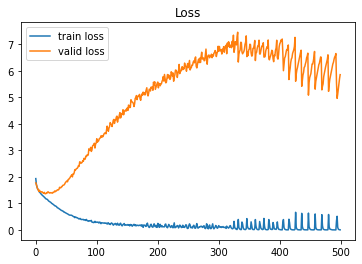

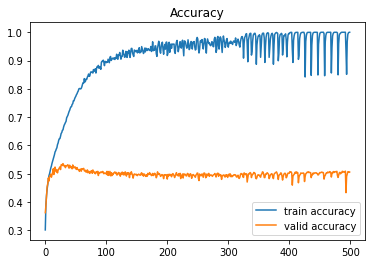

In [8]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

### SGD

In [9]:
# 建立一個有三層隱藏層之神經網路
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 3072)]            0         
                                                                 
 dense_4 (Dense)             (None, 512)               1573376   
                                                                 
 dense_5 (Dense)             (None, 256)               131328    
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [10]:
"""
Compile 模型
"""
import tensorflow as tf
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov=True)
model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])


In [11]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=100, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Epoch 1/100
196/196 [==============================] - 3s 13ms/step - loss: 2.0990 - accuracy: 0.2476 - val_loss: 1.9460 - val_accuracy: 0.3136
Epoch 2/100
196/196 [==============================] - 1s 7ms/step - loss: 1.8910 - accuracy: 0.3317 - val_loss: 1.8585 - val_accuracy: 0.3378
Epoch 3/100
196/196 [==============================] - 1s 7ms/step - loss: 1.8152 - accuracy: 0.3602 - val_loss: 1.7890 - val_accuracy: 0.3673
Epoch 4/100
196/196 [==============================] - 1s 8ms/step - loss: 1.7659 - accuracy: 0.3766 - val_loss: 1.7445 - val_accuracy: 0.3864
Epoch 5/100
196/196 [==============================] - 1s 8ms/step - loss: 1.7270 - accuracy: 0.3919 - val_loss: 1.7157 - val_accuracy: 0.3952
Epoch 6/100
196/196 [==============================] - 2s 8ms/step - loss: 1.6954 - accuracy: 0.4054 - val_loss: 1.6876 - val_accuracy: 0.4020
Epoch 7/100
196/196 [==============================] - 2s 8ms/step - loss: 1.6666 - accuracy: 0.4135 - val_loss: 1.6593 - val_accuracy: 0.418

Epoch 58/100
196/196 [==============================] - 1s 7ms/step - loss: 1.0734 - accuracy: 0.6241 - val_loss: 1.4358 - val_accuracy: 0.5001
Epoch 59/100
196/196 [==============================] - 1s 7ms/step - loss: 1.0664 - accuracy: 0.6252 - val_loss: 1.4046 - val_accuracy: 0.5043
Epoch 60/100
196/196 [==============================] - 1s 8ms/step - loss: 1.0570 - accuracy: 0.6278 - val_loss: 1.4785 - val_accuracy: 0.4934
Epoch 61/100
196/196 [==============================] - 1s 7ms/step - loss: 1.0533 - accuracy: 0.6300 - val_loss: 1.3973 - val_accuracy: 0.5099
Epoch 62/100
196/196 [==============================] - 1s 7ms/step - loss: 1.0452 - accuracy: 0.6315 - val_loss: 1.3472 - val_accuracy: 0.5273
Epoch 63/100
196/196 [==============================] - 1s 7ms/step - loss: 1.0359 - accuracy: 0.6377 - val_loss: 1.3484 - val_accuracy: 0.5310
Epoch 64/100
196/196 [==============================] - 1s 7ms/step - loss: 1.0280 - accuracy: 0.6381 - val_loss: 1.3580 - val_accuracy:

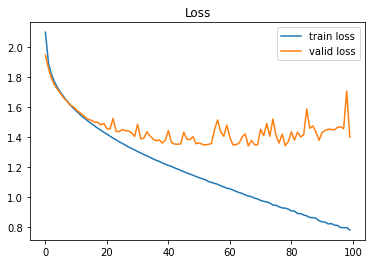

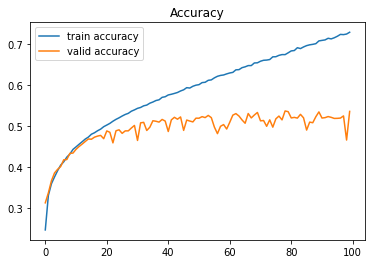

In [12]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

In [ ]:
#觀察 learning curve 的走勢:  overfitting